In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import scipy as sp

### Continuous Probability Distribution
- Gaussian normal distribution
- Student T distribution
- Chi-square distribution
- F-distribution

### Gaussian Normal distribution
- 자연현상에서 나타내는 숫자를 확률 모형으로 모형화할 때 가장 많이 쓰이는 확률 모형입니다.
- N(x;mu,sigma^2) = `1/(2*pi*sigma^2)*exp(-(x-mu)^2/2*sigma^2)`
- 정규 분포 중에서도 평균이 0이고 분산이 1인 정규 분포를 standard normal distribution이라고 합니다.
- 정규 분포의 pmf는 다음과 같은 성질을 가집니다.
    - x=mu, density is maximized.
    - x->-infinite or x->infinite density is getting smaller.

### Q-Q plot (Quantile - Quantile plot)
- 어떠한 확률 변수의 분포가 정규 분포인지 아닌지를 검정 -> Normality test
- normality test 중 간단하게 검정하는 방법 중 하나가 Q-Q plot testing
- Q-Q plot process:
    - sample data sorting
    - sample data의 quantile function value 를 구합니다. 즉, 전체 중 몇 %인지를 구한다.
   
    - 각 sample data의 quantile value가 normal dist 의 cdf 값이 되는 standard normal dist의 value 즉, quantile을 구한다.
    - sample data와 그에 대응하는 normal dist value를 mapping해서 하나의 point로 만든다.
    - 모든 sample에 위의 process를 적용, scatter plot을 만든다.

### Central Limit Theorem
- 실세계에서 발생하는 현상 중 많은 것들이 normal dist로 modeling 이 가능하다고 했습니다.
- 그 이유 중 하나가 바로 Central Limit Theorem 입니다.
- 여러 확률 변수의 합이 정규 분포와 비슷한 분포를 이루는 현상입니다.
- 수학적인 표현:
    - X_1,X_2,...,X_n 다음의 n개의 다른 분포를 가지지만 first,second moment가 같은 분포를 setting한다.
    - N개의 rv에서 sample을 얻는다. x_1,x_2,...,x_n (samples) 그리고 평균을 취해준다. x_bar
    - 샘플 평균의 평균이 0, 분산이 1이 되도록 normalize!! 
    - `z = (x_bar - mu)/ (sigma/sqrt_n)`
    - 정규화된 샘플 평균의 분포는 `n이 증가할 수록 표준 정규 분포에 수렴`합니다.
 

scipy를 사용한 정규 분포의 시뮬레이션

In [2]:
mu=0
std=1
rv=sp.stats.norm(mu,std)
rv

<IPython.core.display.Javascript object>


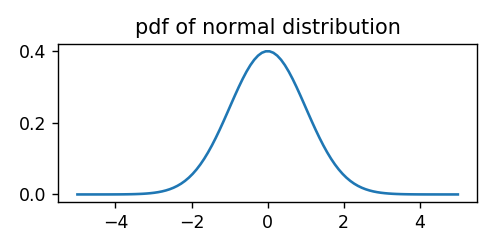

In [3]:
xx=np.linspace(-5,5,100)
plt.figure(figsize=(4,2))
plt.plot(xx,rv.pdf(xx))
plt.title('pdf of normal distribution')
plt.tight_layout()
plt.show()

In [10]:
x=rv.rvs(100,random_state=0)
x[:50]

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028])

<IPython.core.display.Javascript object>


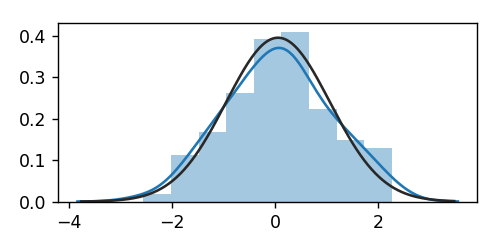

In [11]:
plt.figure(figsize=(4,2))
sns.distplot(x,fit=sp.stats.norm)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


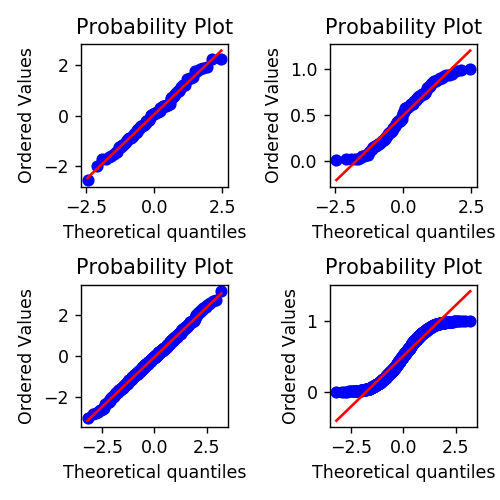

In [22]:
np.random.seed(0)
x1=np.random.randn(100)
plt.figure(figsize=(4,4))
plt.subplot(221)
sp.stats.probplot(x1,plot=plt)
x2=np.random.rand(100)
plt.subplot(222)
sp.stats.probplot(x2,plot=plt)
x3=np.random.randn(1000)
plt.subplot(223)
sp.stats.probplot(x3,plot=plt)
x4=np.random.rand(1000)
plt.subplot(224)
sp.stats.probplot(x4,plot=plt)
plt.tight_layout()
plt.show()

Central Limit Theorem Simulation

<IPython.core.display.Javascript object>


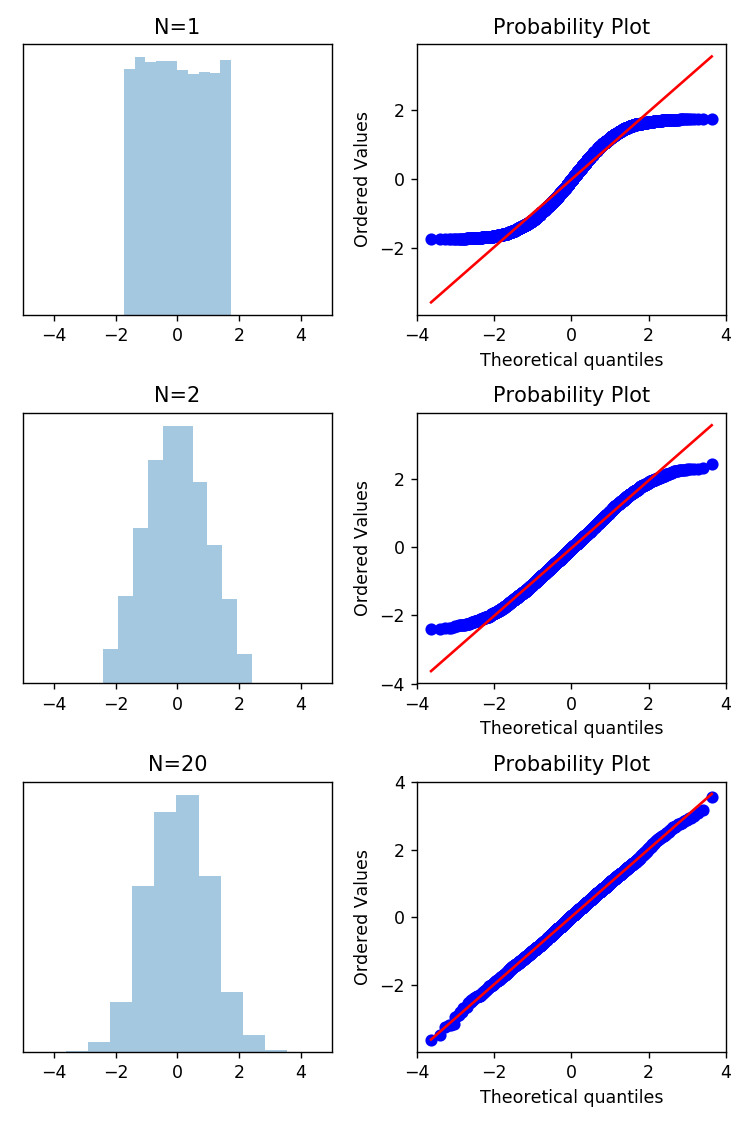

In [27]:
np.random.seed(0)
xx=np.linspace(-2,2,100)
plt.figure(figsize=(6,9))
for i,N in enumerate([1,2,20]):   #i-> 0,1,2 // N-> 1,2,20
    X=np.random.rand(5000,N)     # 균등분포를 따르는 sample들을 각각 1,2,20 개씩 뽑습니다.
    Xbar = (X.mean(axis=1)-0.5)*np.sqrt(12*N)  # 0에서 1사이의 균등 분포의 평균은 1/2, 분산은 1/12인 것에 기반합니다.(Normalize)
    ax=plt.subplot(3,2,2*i+1)
    sns.distplot(Xbar,bins=10,kde=False,norm_hist=True)
# kde :    Whether to plot a gaussian kernel density estimate.
# norm-hist : If True, the histogram height shows a density rather than a count. This is implied if a KDE or fitted density is plotted.
    plt.xlim(-5,5)
    plt.yticks([])
    ax.set_title('N={}'.format(N))
    plt.subplot(3,2,2*i+2)
    sp.stats.probplot(Xbar,plot=plt)
plt.tight_layout()
plt.show()

### T-distribution
- normal distribution이 자연에서 발생하는 현상 중 많은 것들을 따른다고 했습니다.
- 이러한 데이터들을 자세히 살펴보면 실제로는 정규분포보다 양 끝단의 비중이 더 큰 것을 알 수 있습니다.
- 이를 `fat tail`이라고 합니다.
- normal dist와는 달리 정수값을 가지는 degree of freedom이라는 parameter를 추가적으로 가집니다.
- `t(x;mu,sigma^2,nu)`
- 자유도가 작으면 가우시안 정규 분포보다 분산이 크고 fat tail을 보이지만 자유도가 증가할 수록 가우시안 정규 분포로 수렴하는 것을 볼 수 있습니다.
- moment of t-distribution:
    - first moment(expectation): E[X] =`Mu`
    - second moment(variation) : Var[X] = `nu*sigma^2/(nu-2)`

### 정규 분포의 샘플 평균이 이루는 분포
- 위에서 CLT에 따르면, 모든 rv의 합은 샘플의 갯수가 증가할 수록 norm-dist로 수렴한다고 했습니다.
- 만약 샘플의 갯수가 not infinite하다면?
- norm-dist에서 얻은 n개의 샘플(x_1,..,x_n)를 평균을 취하고 `샘플 표준편차`로 normalizing 해준 값은 자유도가 n-1인 t-dist를 따릅니다.
- 이론적 표준 편차라는 `상수`로 정규화한 샘플 평균:
    - `(z = x_bar - Mu)/(sigma/np.sqrt(n))`
- 샘플 평균을 샘플 분산으로 정규화한 값:
    - `t = (x_bar - Mu)/(sample std/np.sqrt(n))~t(x;0,1,n-1)`
- 여기서 x_bar는 1/n*(x_1+,,,+x_n)
- 여기서 samplt std는 1/n-1*(sigma from 1 to n(x_i - x_bar)^2) 입니다.

<IPython.core.display.Javascript object>


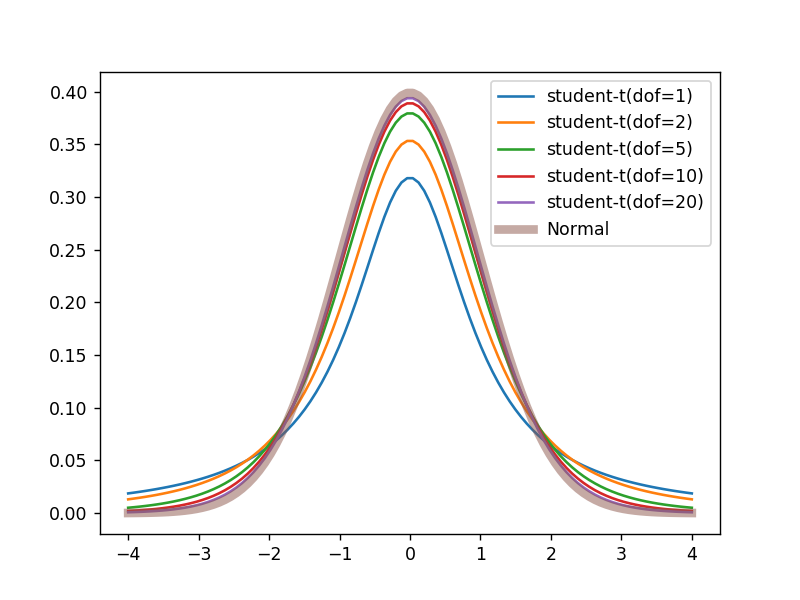

In [29]:
xx=np.linspace(-4,4,100)
for df in [1,2,5,10,20]:# 자유도가 점점 커지고 있습니다.
    rv = sp.stats.t(df=df)
    plt.plot(xx,rv.pdf(xx),label=('student-t(dof=%d)'%df)) # 커지는 자유도를 t-dist에 적용
plt.plot(xx, sp.stats.norm().pdf(xx), label="Normal", lw=5, alpha=0.5)#normal-dist와 비교
plt.legend()
plt.show()